# Innovation at Uber: The Launch of Express POOL
#### Author: Faraz Ahmad (faraza)

In [257]:
import pandas as pd
import numpy as np
from scipy import stats

In [258]:
df=pd.read_csv("uber.csv")

In [259]:
df

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,2/19/18 7:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476
1,Boston,2/19/18 9:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275
2,Boston,2/19/18 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962
3,Boston,2/19/18 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021
4,Boston,2/19/18 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979
...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,3/4/2018 17:40,5 mins,True,False,1718,2655,173,28288.52115,2600,1361
122,Boston,3/4/2018 20:20,2 mins,False,False,1303,2334,158,27072.60635,2164,940
123,Boston,3/4/2018 23:00,5 mins,True,False,1157,2359,154,23525.11595,2323,1473
124,Boston,3/5/2018 1:40,2 mins,False,False,1170,2240,131,23005.27027,2257,900


### Hypothesis Testing using t-tests for all variables

The control group for the experiment will be riders given a 2 minute wait time and the treatment group consists of riders having 5 minute wait time. 

- Null Hypothesis (H0): There is no significant difference in the total number of rides between 2 minutes and 5 minutes wait times.
- Alternative Hypothesis (H1): There is a significant difference in the total number of rides between 2 minutes and 5 minutes wait times.

Similarly we compare the null and alternative hypothesis for all the different variables.

- Total ridesharing trips
- Pool trips
- Express Pool trips
- Rider cancellations
- Cost per trip
- Match rate (i.e. total matches / total trips)
- Double match rate (i.e. total double matches / total trips)

In [260]:
df['total_rides']=df['trips_express']+ df['trips_pool']
df['cost_per_trip']= df['total_driver_payout'] /df['total_rides']
df['match_rate']= df['total_matches']/df['total_rides']
df['double_match_rate']= df['total_double_matches']/df['total_rides']

wait_time_2min = df[df['wait_time'] == '2 mins']
wait_time_5min = df[df['wait_time'] == '5 mins']

variables_to_compare = ['total_rides', 'trips_pool', 'trips_express', 
                         'rider_cancellations', 'cost_per_trip', 
                         'match_rate', 'double_match_rate']

results = {}
for variable in variables_to_compare:
    _, p_value = stats.ttest_ind(wait_time_2min[variable], wait_time_5min[variable])
    #print("Difference of values betweencontrol and treatment groups: ",wait_time_2min[variable].sum()-wait_time_5min[variable].sum())
    results[variable] = {'p_value': p_value}

for variable, result in results.items():
    print(f"{variable}: p-value = {result['p_value']:.4f}")

total_rides: p-value = 0.3973
trips_pool: p-value = 0.0212
trips_express: p-value = 0.0296
rider_cancellations: p-value = 0.0066
cost_per_trip: p-value = 0.0007
match_rate: p-value = 0.0131
double_match_rate: p-value = 0.0144


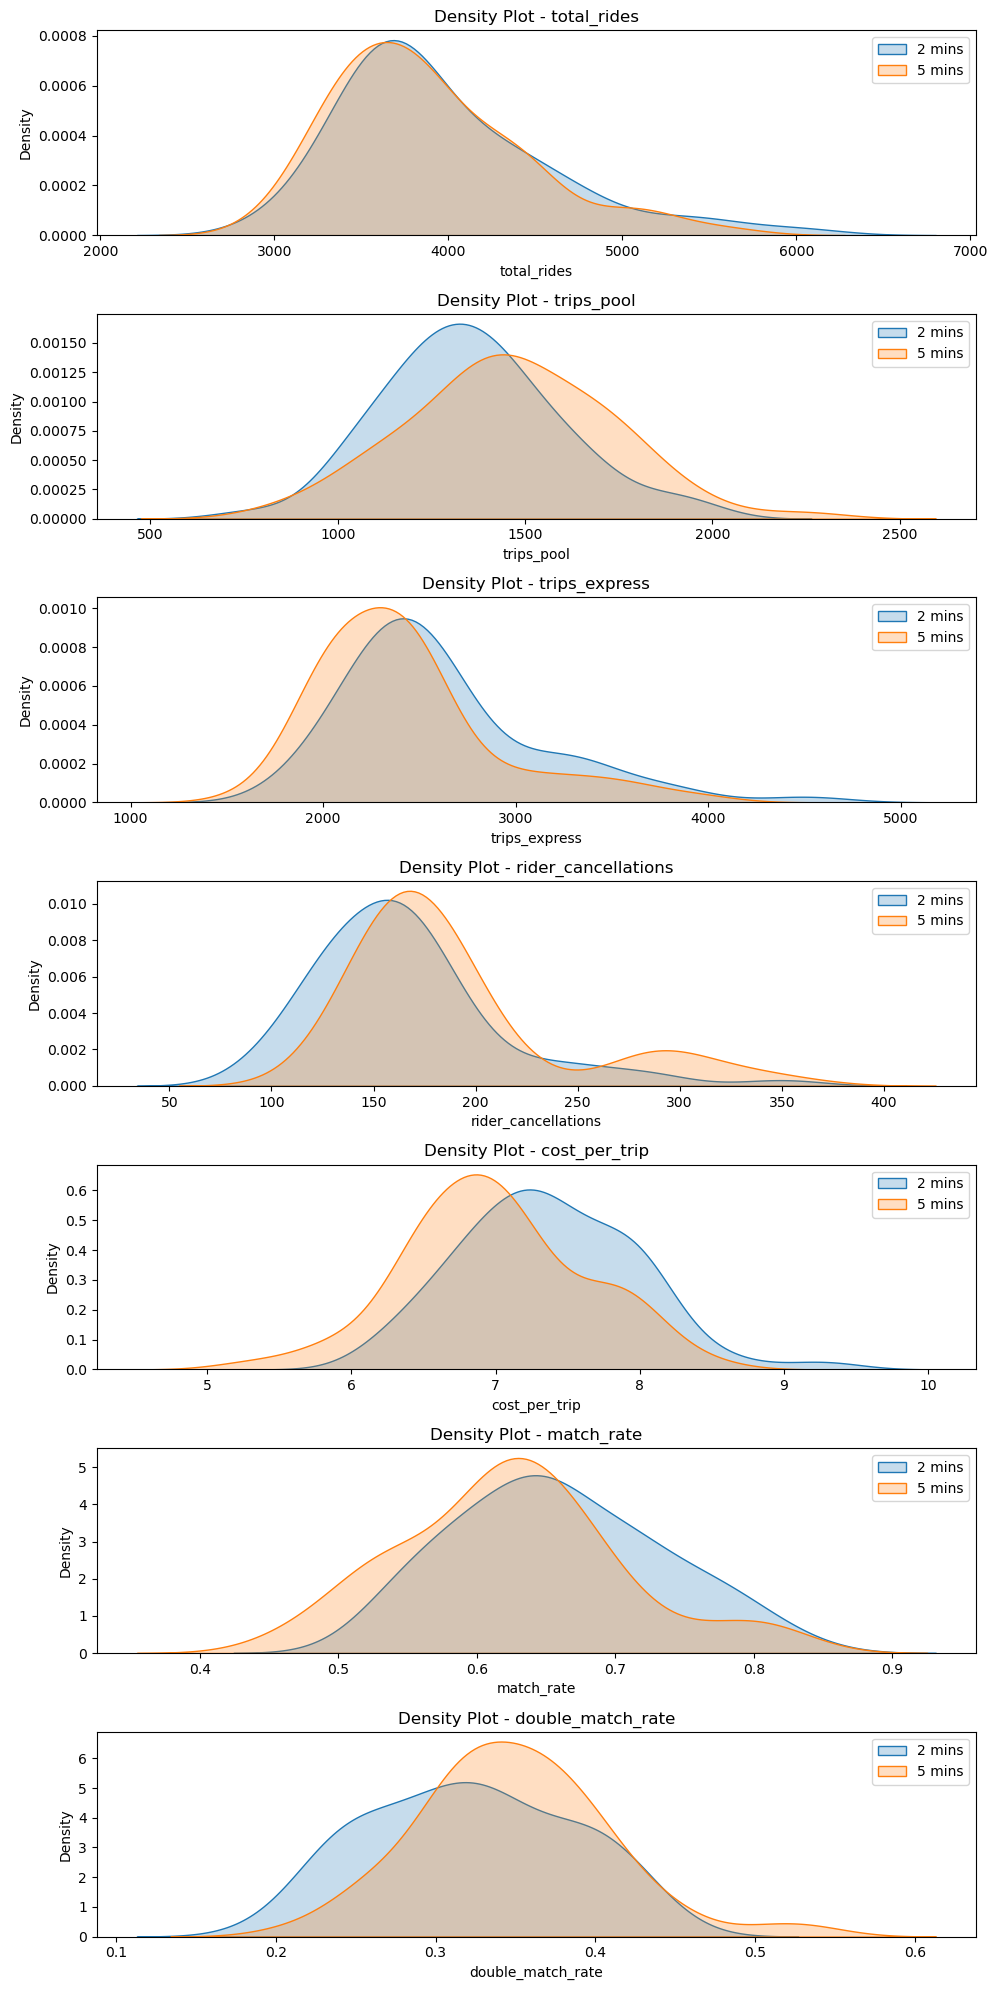

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings('ignore')

fig, axes = plt.subplots(nrows=len(variables_to_compare), ncols=1, figsize=(10, 20))

for i, variable in enumerate(variables_to_compare):
    sns.kdeplot(data=wait_time_2min[variable], label='2 mins', shade=True, ax=axes[i])
    sns.kdeplot(data=wait_time_5min[variable], label='5 mins', shade=True, ax=axes[i])
    
    axes[i].set_title(f'Density Plot - {variable}')
    axes[i].set_xlabel(variable)
    axes[i].legend()

plt.tight_layout()
plt.show()

#### total_rides (p-value = 0.3973):

- The p-value is greater than the typical significance level (e.g., 0.05).
- There is not enough evidence to reject the null hypothesis that there is no significant difference in total rides between 2 minutes and 5 minutes wait times.

#### trips_pool (p-value = 0.0212):

- The p-value is less than the typical significance level.
- There is evidence to reject the null hypothesis, suggesting a significant difference in the number of pool trips between 2 minutes and 5 minutes wait times.

#### trips_express (p-value = 0.0296):

- There is evidence to reject the null hypothesis, indicating a significant difference in the number of express pool trips between the wait times.

#### rider_cancellations (p-value = 0.0066):

- The p-value is less than the significance level.
- There is evidence to reject the null hypothesis, suggesting a significant difference in rider cancellations between 2 minutes and 5 minutes wait times.

#### cost_per_trip (p-value = 0.0007):

- The p-value is highly significant.
- There is strong evidence to reject the null hypothesis, indicating a significant difference in the cost per trip between the two wait times.

#### match_rate (p-value = 0.0131):

- The p-value is less than the significance level.
- There is evidence to reject the null hypothesis, suggesting a significant difference in match rates between 2 minutes and 5 minutes wait times.

#### double_match_rate (p-value = 0.0144):

- There is evidence to reject the null hypothesis, indicating a significant difference in double match rates between the two wait times.



In [262]:
df

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,total_rides,cost_per_trip,match_rate,double_match_rate
0,Boston,2/19/18 7:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476,4660,7.394509,0.723605,0.316738
1,Boston,2/19/18 9:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275,3824,7.783564,0.598326,0.333421
2,Boston,2/19/18 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962,3546,7.737554,0.643824,0.271292
3,Boston,2/19/18 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021,5568,8.081080,0.724677,0.362967
4,Boston,2/19/18 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979,3951,6.981512,0.556821,0.247785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,3/4/2018 17:40,5 mins,True,False,1718,2655,173,28288.52115,2600,1361,4373,6.468905,0.594558,0.311228
122,Boston,3/4/2018 20:20,2 mins,False,False,1303,2334,158,27072.60635,2164,940,3637,7.443664,0.594996,0.258455
123,Boston,3/4/2018 23:00,5 mins,True,False,1157,2359,154,23525.11595,2323,1473,3516,6.690875,0.660694,0.418942
124,Boston,3/5/2018 1:40,2 mins,False,False,1170,2240,131,23005.27027,2257,900,3410,6.746414,0.661877,0.263930


In [263]:
driver_payout_control= wait_time_2min['total_driver_payout'].sum()
driver_payout_control

1845348.05205

In [264]:
driver_payout_treatment= wait_time_5min['total_driver_payout'].sum()
driver_payout_treatment

1712541.7505299998

In [265]:
print("Difference in the total driver paymout between control and treatment group= $",driver_payout_control-driver_payout_treatment)

Difference in the total driver paymout between control and treatment group= $ 132806.3015200002


Yes, increasing the wait times reduces the cost for Uber. As a result this effect can replicate across multiple cities if the wait time is increased to 5 minutes. Longer wait times increase cancellation rates, but reduce the costs per ride

In [266]:
avg_cost_per_trip_5_min= df[df['treat']==True]['cost_per_trip'].mean()
avg_cost_per_trip_2_min= df[df['treat']==False]['cost_per_trip'].mean()

print("Difference b/w avg. cost per trip for 2 min and 5 min waiting time=, $",avg_cost_per_trip_2_min-avg_cost_per_trip_5_min)


Difference b/w avg. cost per trip for 2 min and 5 min waiting time=, $ 0.3774085141390957


In [267]:
total_cancelled_trips= df['rider_cancellations'].sum()
cancelled_trips_5_min= df[df['treat']==True]['rider_cancellations'].sum()
lost_trips_due_to_treatment= total_cancelled_trips- cancelled_trips_5_min 
print("Lost trips due to treatment=" ,lost_trips_due_to_treatment)

Lost trips due to treatment= 10417


If the average revenue per trip is x. Then total loss due to lost trips after increasing the waiting time = 10417x
- Revenue per trip needed = Total Lost Revenue / Number of lost trips

In [268]:
total_loss= 1600000
#required_earning_per_trip = total_loss/ df[df['treat']==True]['rider_cancellations'].sum()
#print(f"Required Earning Per Trip: ${required_earning_per_trip: .2f}")

In [269]:
df
df_encoded = pd.get_dummies(df, columns=['wait_time'], drop_first=True)
df_encoded['wait_time_5 mins']= df_encoded['wait_time_5 mins'].astype(int)
df_encoded

,city_id,period_start,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,total_rides,cost_per_trip,match_rate,double_match_rate,wait_time_5 mins
0,Boston,2/19/18 7:00,False,True,1415,3245,256,34458.41163,3372,1476,4660,7.394509,0.723605,0.316738,0
1,Boston,2/19/18 9:40,True,False,1461,2363,203,29764.34982,2288,1275,3824,7.783564,0.598326,0.333421,1
2,Boston,2/19/18 12:20,False,False,1362,2184,118,27437.36736,2283,962,3546,7.737554,0.643824,0.271292,0
3,Boston,2/19/18 15:00,True,True,1984,3584,355,44995.45299,4035,2021,5568,8.081080,0.724677,0.362967,1
4,Boston,2/19/18 17:40,False,False,1371,2580,181,27583.95530,2200,979,3951,6.981512,0.556821,0.247785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,3/4/2018 17:40,True,False,1718,2655,173,28288.52115,2600,1361,4373,6.468905,0.594558,0.311228,1
122,Boston,3/4/2018 20:20,False,False,1303,2334,158,27072.60635,2164,940,3637,7.443664,0.594996,0.258455,0
123,Boston,3/4/2018 23:00,True,False,1157,2359,154,23525.11595,2323,1473,3516,6.690875,0.660694,0.418942,1
124,Boston,3/5/2018 1:40,False,False,1170,2240,131,23005.27027,2257,900,3410,6.746414,0.661877,0.263930,0


In [270]:
import statsmodels.api as sm

outcome_variables = ['total_rides', 'trips_pool', 'trips_express', 'rider_cancellations', 'cost_per_trip', 'match_rate', 'double_match_rate']

for variable in outcome_variables:
    # Create a regression model
    model = sm.OLS(df_encoded[variable], sm.add_constant(df_encoded['wait_time_5 mins']))
    
    # Fit the model
    results = model.fit()
    
    # Print regression results
    print(f"Regression Results for {variable}:")
    print(results.summary())
    print("\n")

Regression Results for total_rides:Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                            OLS Regression Results                            
Dep. Variable:            total_rides   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7214
Date:                Mon, 12 Feb 2024   Prob (F-statistic):              0.397
Time:                        08:27:55   Log-Likelihood:                -978.27
No. Observations:                 126   AIC:                             1961.
Df Residuals:                     124   BIC:                             1966.
Df Model:                           1                                         
Cov

#### Observations
- The 5-minute wait time is associated with changes in various outcomes.
- Pool trips and express trips show significant changes, suggesting potential shifts in user behavior.
- An increase in cancellations with the 5-minute wait time raises concerns about user satisfaction.
- Cost per trip decreases, which might be a positive aspect for riders.
- Changes in match rates and double match rates indicate potential impacts on system efficiency.

We can see that the overall cost per trip is reduced for Uber which adds to our earlier analysis. 

Q- One of your data scientists suggests that the optimal wait time may differ by whether the time of the day is a commuting period. You first want to understand whether riders behave differently in commuting vs. non-commuting hours, independently of the increase in wait time. In order to understand differences between commuting and non-commuting hours, you first focus your analysis on the control group (with a 2-minute wait time) only and answer the following questions:

- Do commuting hours experience a higher number of total ridesharing trips compared to non-commuting hours? What is the difference in the numbers of ridesharing trips? Is the difference statistically significant at the 5% confidence level?

- Do riders use Express at higher rates during commuting hours compared to non-commuting hours? What is the difference in the share of Express trips between commuting and non-commuting hours? Is the difference statistically significant at the 5% confidence level?

- Assume that riders pay \\$12.5 on average for a POOL ride, and $10 for an Express ride. What is the difference in revenues between commuting and non-commuting hours? Is the difference statistically significant at the 5% confidence level?

- Assume again that riders pay \\$ 12.5 on average for a POOL ride, and $ 10 for an Express ride. What is the difference in profits per trip between commuting and non-commuting hours? Is the difference statistically significant at the 5% confidence level?

In [271]:
treatment_commute=df[df['treat']==False]
commuting_hours = treatment_commute[(treatment_commute['commute'] == True)]['total_rides']
non_commuting_hours = treatment_commute[(treatment_commute['commute'] == False)]['total_rides']

print("Difference between total rides during commute and non-commute hours:",commuting_hours.sum()-non_commuting_hours.sum())


t_stat, p_value = stats.ttest_ind(commuting_hours, non_commuting_hours)
alpha = 0.05
print(f"p-value = {p_value:.4f}")
if p_value < alpha:
    print(f"Reject the null hypothesis. Commuting hours have a statistically significant difference in number of total rides.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference.")

#More total number of rides during non-commute hours  


Difference between total rides during commute and non-commute hours: -149000
p-value = 0.0000
Reject the null hypothesis. Commuting hours have a statistically significant difference in number of total rides.


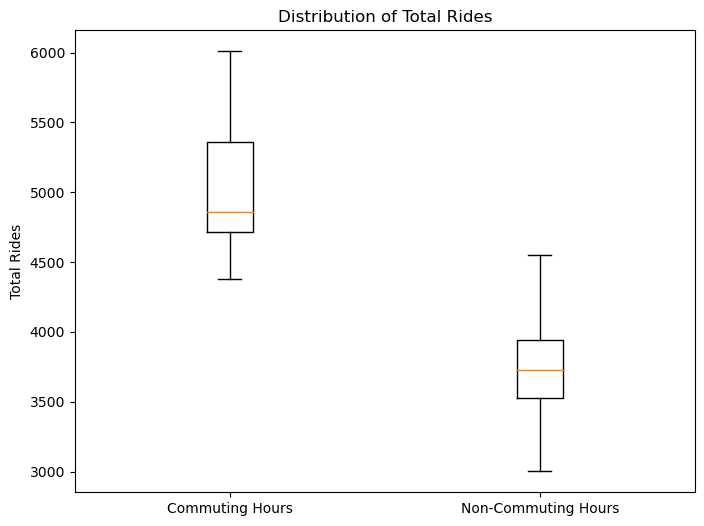

In [272]:
plt.figure(figsize=(8, 6))
plt.boxplot([commuting_hours, non_commuting_hours], labels=['Commuting Hours', 'Non-Commuting Hours'])
plt.title('Distribution of Total Rides')
plt.ylabel('Total Rides')
plt.show()

In [273]:
express_commute = treatment_commute[treatment_commute['commute'] == True]['trips_express'] / treatment_commute[treatment_commute['commute'] == True]['total_rides']
express_non_commute = treatment_commute[treatment_commute['commute'] == False]['trips_express'] / treatment_commute[treatment_commute['commute'] == False]['total_rides']
#print("Difference in usage rate of express trips during commute and non-commute hours= ", express_commute.mean()-express_non_commute.mean())
#print("Difference between share of users using express in commute vs non-commute hours")

print("Total rides during commute= ",treatment_commute[treatment_commute['commute']==True]['total_rides'].sum())
print("Express during Commute", treatment_commute[treatment_commute['commute']==True]['trips_express'].sum())
print("Share of express users during commute=",treatment_commute[treatment_commute['commute']==True]['trips_express'].sum()/treatment_commute[treatment_commute['commute']==True]['total_rides'].sum()*100,"%")
print("Share of express users during non-commute=",treatment_commute[treatment_commute['commute']==False]['trips_express'].sum()/treatment_commute[treatment_commute['commute']==False]['total_rides'].sum()*100,"%")

# Perform t-test
t_stat, p_value = stats.ttest_ind(express_commute, express_non_commute, alternative='greater')

# Determine statistical significance
print(f"p-value = {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Riders use Express at a statistically significantly higher rate during commuting hours.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in Express usage.")

Total rides during commute=  50460
Express during Commute 35275
Share of express users during commute= 69.90685691636939 %
Share of express users during non-commute= 64.80497342825629 %
p-value = 0.0021
Reject the null hypothesis. Riders use Express at a statistically significantly higher rate during commuting hours.


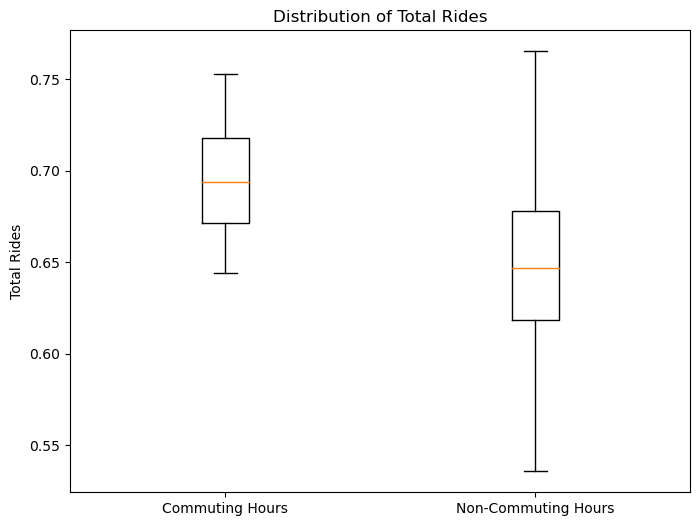

In [274]:
plt.figure(figsize=(8, 6))
plt.boxplot([express_commute, express_non_commute], labels=['Commuting Hours', 'Non-Commuting Hours'])
plt.title('Distribution of Total Rides')
plt.ylabel('Total Rides')
plt.show()

In [275]:
df['pool_revenue']= 12.5 * df['trips_pool']
df['express_revenue']= 10 * df['trips_express']
df['total_revenue']= df['pool_revenue']+df['express_revenue']
#Analysis only for control group 
#total_revenue_commute = df[df['commute'] == True]['total_revenue']
#total_revenue_non_commute = df[df['commute'] == False]['total_revenue']
treatment_commute=df[df['treat']==False]
total_revenue_commute = treatment_commute[treatment_commute['commute'] == True]['total_revenue']
total_revenue_non_commute = treatment_commute[treatment_commute['commute'] == False]['total_revenue']

In [276]:
print(f"Total Revenue during commute hours: ${total_revenue_commute.sum():.2f}")
print(f"Total Revenue during non-commute hours: ${total_revenue_non_commute.sum():.2f}")
print(f"Difference in Revenue during commute and non-commute hours: ${total_revenue_non_commute.sum()-total_revenue_commute.sum() }")

Total Revenue during commute hours: $542562.50
Total Revenue during non-commute hours: $2170100.00
Difference in Revenue during commute and non-commute hours: $1627537.5


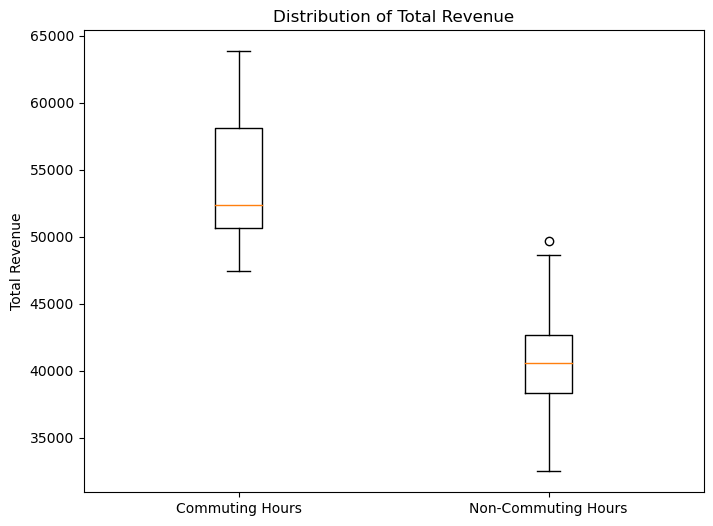

In [277]:
plt.figure(figsize=(8, 6))
plt.boxplot([total_revenue_commute, total_revenue_non_commute], labels=['Commuting Hours', 'Non-Commuting Hours'])
plt.title('Distribution of Total Revenue')
plt.ylabel('Total Revenue')
plt.show()

In [278]:
t_stat, p_value = stats.ttest_ind(total_revenue_commute, total_revenue_non_commute)

alpha = 0.05
print(f"p-value = {p_value:.4f}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in revenues between commuting and non-commuting hours.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in revenues.")

p-value = 0.0000
Reject the null hypothesis. There is a statistically significant difference in revenues between commuting and non-commuting hours.


In [279]:
df['total_revenue_per_trip']=df['total_revenue']/df['total_rides']
df['profit']= df['total_revenue'] - df['total_driver_payout']
df['profit_per_trip']= df['total_revenue_per_trip'] - df['cost_per_trip']

In [280]:
df

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,...,total_rides,cost_per_trip,match_rate,double_match_rate,pool_revenue,express_revenue,total_revenue,total_revenue_per_trip,profit,profit_per_trip
0,Boston,2/19/18 7:00,2 mins,False,True,1415,3245,256,34458.41163,3372,...,4660,7.394509,0.723605,0.316738,17687.5,32450,50137.5,10.759120,15679.08837,3.364611
1,Boston,2/19/18 9:40,5 mins,True,False,1461,2363,203,29764.34982,2288,...,3824,7.783564,0.598326,0.333421,18262.5,23630,41892.5,10.955152,12128.15018,3.171587
2,Boston,2/19/18 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,...,3546,7.737554,0.643824,0.271292,17025.0,21840,38865.0,10.960237,11427.63264,3.222683
3,Boston,2/19/18 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,...,5568,8.081080,0.724677,0.362967,24800.0,35840,60640.0,10.890805,15644.54701,2.809725
4,Boston,2/19/18 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,...,3951,6.981512,0.556821,0.247785,17137.5,25800,42937.5,10.867502,15353.54470,3.885990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,3/4/2018 17:40,5 mins,True,False,1718,2655,173,28288.52115,2600,...,4373,6.468905,0.594558,0.311228,21475.0,26550,48025.0,10.982163,19736.47885,4.513258
122,Boston,3/4/2018 20:20,2 mins,False,False,1303,2334,158,27072.60635,2164,...,3637,7.443664,0.594996,0.258455,16287.5,23340,39627.5,10.895656,12554.89365,3.451992
123,Boston,3/4/2018 23:00,5 mins,True,False,1157,2359,154,23525.11595,2323,...,3516,6.690875,0.660694,0.418942,14462.5,23590,38052.5,10.822668,14527.38405,4.131793
124,Boston,3/5/2018 1:40,2 mins,False,False,1170,2240,131,23005.27027,2257,...,3410,6.746414,0.661877,0.263930,14625.0,22400,37025.0,10.857771,14019.72973,4.111358


In [281]:
treatment_commute=df[df['treat']==False]
#total_profit_per_trip_commute = df[df['commute'] == True]['profit_per_trip']
#total_profit_per_trip_non_commute = df[df['commute'] == False]['profit_per_trip']
total_profit_per_trip_commute = treatment_commute[treatment_commute['commute'] == True]['profit_per_trip']
total_profit_per_trip_non_commute = treatment_commute[treatment_commute['commute'] == False]['profit_per_trip']
print(f"Total Average Profit per trip during commute hours: ${total_profit_per_trip_commute.mean():.2f}")
print(f"Total Average Profit per trip during non-commute hours: ${total_profit_per_trip_non_commute.mean():.2f}")
#More average profit per trip during commute by 0.66

Total Average Profit per trip during commute hours: $2.94
Total Average Profit per trip during non-commute hours: $3.60


In [282]:
t_stat, p_value = stats.ttest_ind(total_profit_per_trip_commute, total_profit_per_trip_non_commute)

alpha = 0.05
print(f"p-value = {p_value:.4f}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in profit per trip between commuting and non-commuting hours.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in profit per trip.")

p-value = 0.0010
Reject the null hypothesis. There is a statistically significant difference in profit per trip between commuting and non-commuting hours.


#### Now turn to analysing the effect of the wait time change (i.e. the difference between treatment and control group) during commuting and non-commuting hours. You first need to compare treatment and control group during commuting hours, then during non-commuting hours. Answer the following questions:

#### Commuting hours:

- What is the difference in the number of ridesharing trips between the treatment and control groups during commuting hours?
Is the difference statistically significant at the 5% confidence level?
- What is the difference in the number of rider cancellations between the treatment and control groups during commuting hours? Is the difference statistically significant at the 5% confidence level?
- What is the difference in driver payout per trip between the treatment and control groups during commuting hours?
Is the difference statistically significant at the 5% confidence level?
- What is the difference in overall match rate between the treatment and control groups during commuting hours?
Is the difference statistically significant at the 5% confidence level?
- What is the difference in double match rate between the treatment and control groups during commuting hours?
Is the difference statistically significant at the 5% confidence level?
- Does the analysis support extending waiting times to 5 minutes for commuting hours?

Non-commuting hours:

- What is the difference in the number of ridesharing trips between the treatment and control groups during non-commuting hours?
Is the difference statistically significant at the 5% confidence level?
- What is the difference in the number of rider cancellations between the treatment and control groups during non-commuting hours?
Is the difference statistically significant at the 5% confidence level?
- What is the difference in driver payout per trip between the treatment and control groups during non-commuting hours? 
Is the difference statistically significant at the 5% confidence level?
- What is the difference in overall match rate between the treatment and control groups during non-commuting hours?
Is the difference statistically significant at the 5% confidence level?
- What is the difference in double match rate between the treatment and control groups during non-commuting hours?
Is the difference statistically significant at the 5% confidence level?
- Does the analysis support extending waiting times to 5 minutes for non-commuting hours?

In [283]:
df

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,...,total_rides,cost_per_trip,match_rate,double_match_rate,pool_revenue,express_revenue,total_revenue,total_revenue_per_trip,profit,profit_per_trip
0,Boston,2/19/18 7:00,2 mins,False,True,1415,3245,256,34458.41163,3372,...,4660,7.394509,0.723605,0.316738,17687.5,32450,50137.5,10.759120,15679.08837,3.364611
1,Boston,2/19/18 9:40,5 mins,True,False,1461,2363,203,29764.34982,2288,...,3824,7.783564,0.598326,0.333421,18262.5,23630,41892.5,10.955152,12128.15018,3.171587
2,Boston,2/19/18 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,...,3546,7.737554,0.643824,0.271292,17025.0,21840,38865.0,10.960237,11427.63264,3.222683
3,Boston,2/19/18 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,...,5568,8.081080,0.724677,0.362967,24800.0,35840,60640.0,10.890805,15644.54701,2.809725
4,Boston,2/19/18 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,...,3951,6.981512,0.556821,0.247785,17137.5,25800,42937.5,10.867502,15353.54470,3.885990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,3/4/2018 17:40,5 mins,True,False,1718,2655,173,28288.52115,2600,...,4373,6.468905,0.594558,0.311228,21475.0,26550,48025.0,10.982163,19736.47885,4.513258
122,Boston,3/4/2018 20:20,2 mins,False,False,1303,2334,158,27072.60635,2164,...,3637,7.443664,0.594996,0.258455,16287.5,23340,39627.5,10.895656,12554.89365,3.451992
123,Boston,3/4/2018 23:00,5 mins,True,False,1157,2359,154,23525.11595,2323,...,3516,6.690875,0.660694,0.418942,14462.5,23590,38052.5,10.822668,14527.38405,4.131793
124,Boston,3/5/2018 1:40,2 mins,False,False,1170,2240,131,23005.27027,2257,...,3410,6.746414,0.661877,0.263930,14625.0,22400,37025.0,10.857771,14019.72973,4.111358


In [284]:
commuting_hours_df = df[df['commute'] == True]
control_2min = commuting_hours_df[commuting_hours_df['wait_time'] == '2 mins']
treatment_5min = commuting_hours_df[commuting_hours_df['wait_time'] == '5 mins']
metrics_to_compare = ['total_rides', 'rider_cancellations', 'total_driver_payout', 'match_rate', 'double_match_rate']
for metric in metrics_to_compare:
    t_stat, p_value = stats.ttest_ind(control_2min[metric], treatment_5min[metric])
    print(f"\nMetric: {metric}")
    print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
    print("Difference between control and treatment group: ",control_2min[metric].sum()-treatment_5min[metric].sum())
    alpha = 0.05
    if p_value < alpha:
        print("Statistically significant difference!")
    else:
        print("Not enough evidence to establish statistically significant difference")


Metric: total_rides
T-Statistic: 1.4196622182817156, P-Value: 0.17279343556167226
Difference between control and treatment group:  3219
Not enough evidence to establish statistically significant difference

Metric: rider_cancellations
T-Statistic: -3.19530679355085, P-Value: 0.005013947752668775
Difference between control and treatment group:  -563
Statistically significant difference!

Metric: total_driver_payout
T-Statistic: 1.6806315641161096, P-Value: 0.11010498008681915
Difference between control and treatment group:  37801.943010000046
Not enough evidence to establish statistically significant difference

Metric: match_rate
T-Statistic: 0.4736882687323849, P-Value: 0.6414167785491836
Difference between control and treatment group:  0.1474256744322302
Not enough evidence to establish statistically significant difference

Metric: double_match_rate
T-Statistic: -1.1159412265942374, P-Value: 0.27912397779870607
Difference between control and treatment group:  -0.29674907956200913
No

#### Based on these results, the analysis does not strongly support extending waiting times to 5 minutes for non-commuting hours, as there are only significant differences in rider cancellations. Other metrics do not show a consistent pattern favoring the 5-minute wait time.

In [285]:
non_commuting_hours_df = df[df['commute'] == False]
control_2min_non_commute = non_commuting_hours_df[non_commuting_hours_df['wait_time'] == '2 mins']
treatment_5min_non_commute = non_commuting_hours_df[non_commuting_hours_df['wait_time'] == '5 mins']
metrics_to_compare_non_commute = ['total_rides', 'rider_cancellations', 'total_driver_payout', 'match_rate', 'double_match_rate']
for metric in metrics_to_compare_non_commute:
    t_stat_non_commute, p_value_non_commute = stats.ttest_ind(control_2min_non_commute[metric], treatment_5min_non_commute[metric])
    print(f"\nMetric: {metric} (Non-Commuting Hours)")
    print(f"T-Statistic: {t_stat_non_commute}, P-Value: {p_value_non_commute}")
    print("Difference between control and treatment group: ",control_2min_non_commute[metric].sum()-treatment_5min_non_commute[metric].sum())
    alpha = 0.05
    if p_value_non_commute < alpha:
        print("Statistically significant difference!")
    else:
        print("Not enough evidence to establish statistically significant difference")
#Better measure to use average mean of difference


Metric: total_rides (Non-Commuting Hours)
T-Statistic: 0.598129019162737, P-Value: 0.5510542032399828
Difference between control and treatment group:  2256
Not enough evidence to establish statistically significant difference

Metric: rider_cancellations (Non-Commuting Hours)
T-Statistic: -4.218270107794951, P-Value: 5.2715316041619e-05
Difference between control and treatment group:  -998
Statistically significant difference!

Metric: total_driver_payout (Non-Commuting Hours)
T-Statistic: 2.9716013997967057, P-Value: 0.003680442840381374
Difference between control and treatment group:  95004.35851000017
Statistically significant difference!

Metric: match_rate (Non-Commuting Hours)
T-Statistic: 3.1157992221554682, P-Value: 0.002371392775942945
Difference between control and treatment group:  2.0475974530258867
Statistically significant difference!

Metric: double_match_rate (Non-Commuting Hours)
T-Statistic: -2.2743631100008344, P-Value: 0.02499710592020494
Difference between control

##### The analysis supports extending waiting times to 5 minutes for non-commuting hours based on significant improvements in rider cancellations, total driver payout, match rate, and double match rate.

#### Using the same outcome variables as above, estimate a set of regressions with interaction effects (between dummy variables indicating treatment and commuting hours) that demonstrate how the effect of the wait time change differs across commuting vs. non-commuting hours.

In [286]:
df_encoded = pd.get_dummies(df, columns=['wait_time','commute'], drop_first=True)

In [287]:
df_encoded['wait_time_5 mins']=df_encoded['wait_time_5 mins'].astype(int)
df_encoded['commute_True']=df_encoded['commute_True'].astype(int)
df_encoded

,city_id,period_start,treat,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,total_rides,...,match_rate,double_match_rate,pool_revenue,express_revenue,total_revenue,total_revenue_per_trip,profit,profit_per_trip,wait_time_5 mins,commute_True
0,Boston,2/19/18 7:00,False,1415,3245,256,34458.41163,3372,1476,4660,...,0.723605,0.316738,17687.5,32450,50137.5,10.759120,15679.08837,3.364611,0,1
1,Boston,2/19/18 9:40,True,1461,2363,203,29764.34982,2288,1275,3824,...,0.598326,0.333421,18262.5,23630,41892.5,10.955152,12128.15018,3.171587,1,0
2,Boston,2/19/18 12:20,False,1362,2184,118,27437.36736,2283,962,3546,...,0.643824,0.271292,17025.0,21840,38865.0,10.960237,11427.63264,3.222683,0,0
3,Boston,2/19/18 15:00,True,1984,3584,355,44995.45299,4035,2021,5568,...,0.724677,0.362967,24800.0,35840,60640.0,10.890805,15644.54701,2.809725,1,1
4,Boston,2/19/18 17:40,False,1371,2580,181,27583.95530,2200,979,3951,...,0.556821,0.247785,17137.5,25800,42937.5,10.867502,15353.54470,3.885990,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,3/4/2018 17:40,True,1718,2655,173,28288.52115,2600,1361,4373,...,0.594558,0.311228,21475.0,26550,48025.0,10.982163,19736.47885,4.513258,1,0
122,Boston,3/4/2018 20:20,False,1303,2334,158,27072.60635,2164,940,3637,...,0.594996,0.258455,16287.5,23340,39627.5,10.895656,12554.89365,3.451992,0,0
123,Boston,3/4/2018 23:00,True,1157,2359,154,23525.11595,2323,1473,3516,...,0.660694,0.418942,14462.5,23590,38052.5,10.822668,14527.38405,4.131793,1,0
124,Boston,3/5/2018 1:40,False,1170,2240,131,23005.27027,2257,900,3410,...,0.661877,0.263930,14625.0,22400,37025.0,10.857771,14019.72973,4.111358,0,0


In [288]:
df_encoded['commute_treatment'] = df_encoded['commute_True'] * df_encoded['wait_time_5 mins']
df_encoded

,city_id,period_start,treat,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,total_rides,...,double_match_rate,pool_revenue,express_revenue,total_revenue,total_revenue_per_trip,profit,profit_per_trip,wait_time_5 mins,commute_True,commute_treatment
0,Boston,2/19/18 7:00,False,1415,3245,256,34458.41163,3372,1476,4660,...,0.316738,17687.5,32450,50137.5,10.759120,15679.08837,3.364611,0,1,0
1,Boston,2/19/18 9:40,True,1461,2363,203,29764.34982,2288,1275,3824,...,0.333421,18262.5,23630,41892.5,10.955152,12128.15018,3.171587,1,0,0
2,Boston,2/19/18 12:20,False,1362,2184,118,27437.36736,2283,962,3546,...,0.271292,17025.0,21840,38865.0,10.960237,11427.63264,3.222683,0,0,0
3,Boston,2/19/18 15:00,True,1984,3584,355,44995.45299,4035,2021,5568,...,0.362967,24800.0,35840,60640.0,10.890805,15644.54701,2.809725,1,1,1
4,Boston,2/19/18 17:40,False,1371,2580,181,27583.95530,2200,979,3951,...,0.247785,17137.5,25800,42937.5,10.867502,15353.54470,3.885990,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,3/4/2018 17:40,True,1718,2655,173,28288.52115,2600,1361,4373,...,0.311228,21475.0,26550,48025.0,10.982163,19736.47885,4.513258,1,0,0
122,Boston,3/4/2018 20:20,False,1303,2334,158,27072.60635,2164,940,3637,...,0.258455,16287.5,23340,39627.5,10.895656,12554.89365,3.451992,0,0,0
123,Boston,3/4/2018 23:00,True,1157,2359,154,23525.11595,2323,1473,3516,...,0.418942,14462.5,23590,38052.5,10.822668,14527.38405,4.131793,1,0,0
124,Boston,3/5/2018 1:40,False,1170,2240,131,23005.27027,2257,900,3410,...,0.263930,14625.0,22400,37025.0,10.857771,14019.72973,4.111358,0,0,0


In [289]:

outcome_variables = ['total_rides', 'rider_cancellations', 'cost_per_trip', 'match_rate', 'double_match_rate']

for variable in outcome_variables:
    # Create a regression model
    model = sm.OLS(df_encoded[variable], sm.add_constant(df_encoded[['wait_time_5 mins','commute_True', 'commute_treatment']])) 
    # Fit the model
    results = model.fit()
    # Print regression results
    print(f"Regression Results for {variable}:")
    print(results.summary())
    print("\n")





Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Regression Results for total_rides:
                            OLS Regression Results                            
Dep. Variable:            total_rides   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     49.33
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.96e-21
Time:                        08:27:55   Log-Likelihood:                -928.59
No. Observations:                 126   AIC:                             1865.
Df Residuals:                     122   BIC:                             1877.
Df Model:                           3                                         
Cov

#### Interpretation

#### Total Rides
- The coefficient for commute_True is 1282.60, indicating that, holding other variables constant, commuting hours are associated with an increase of 1282.60 rides.

#### Rider Cancellation
- The coefficient for wait_time_5 mins is 18.83, suggesting that there is an increase of 18.83 cancellations when the wait time increases from 2 mins to 5 mins. This result is statistically significant (p-value < 0.001).
- The coefficient for commute_True is 96.94, indicating that commuting hours are associated with an increase of 96.94 cancellations.
- The coefficient for commute_treatment is 37.47. This variable represents the interaction effect between treatment (5 mins wait time) and commuting hours, and it is statistically significant (p-value = 0.004).

#### Cost per trip:

- The coefficient for wait_time_5 mins is -0.40, suggesting that there is a decrease of 0.40 in cost per trip when the wait time increases from 2 mins to 5 mins. This result is statistically significant (p-value < 0.001).
- The coefficient for commute_True is 0.53, indicating that commuting hours are associated with an increase of 0.53 in cost per trip. This result is statistically significant (p-value = 0.008).

#### Match Rate
- The coefficient for wait_time_5 mins is -0.04, suggesting that there is a decrease of 0.04 in match rate when the wait time increases from 2 mins to 5 mins. This result is statistically significant (p-value = 0.003).
- The coefficient for commute_True is 0.11, indicating that commuting hours are associated with an increase of 0.11 in match rate. This result is statistically significant (p-value < 0.001).

#### Double Match Rate
- The coefficient for wait_time_5 mins is 0.03, suggesting that there is an increase of 0.03 in double match rate when the wait time increases from 2 mins to 5 mins. This result is statistically significant (p-value = 0.024).


### Observations and Recommendations
### Wait Time Increase Impact:

- Total Rides: There is no statistically significant difference in total rides between 2-minute and 5-minute wait times, regardless of commuting hours. Therefore, extending the wait time may not significantly impact the total number of rides.
- Rider Cancellations: There is a statistically significant increase in rider cancellations with the 5-minute wait time during both commuting and non-commuting hours. This suggests that riders are less willing to wait for a longer duration, leading to cancellations.

### Commuting vs. Non-Commuting Hours:

- Total Rides: Commuting hours show a significant increase in total rides. It's essential to consider this demand surge and ensure sufficient driver availability during these peak hours.
- Rider Cancellations: There is a significant increase in cancellations during commuting hours with the 5-minute wait time. Strategies to mitigate cancellations during peak hours should be explored.

### Financial Considerations:

- Driver Payout: There is no significant difference in driver payout between 2-minute and 5-minute wait times. This suggests that, from a driver perspective, the increase in wait time doesn't significantly impact earnings.
- Cost Per Trip: There is a statistically significant decrease in cost per trip with the 5-minute wait time. While this may benefit riders, it's essential to monitor whether this impacts driver earnings.

### Service Quality:

- Match Rate: There is a decrease in match rate with the 5-minute wait time, though not statistically significant during commuting hours. Maintaining a balance between wait time and match rate is crucial for perceived service quality.
- Double Match Rate: The increase in double match rate with the 5-minute wait time is marginally significant. This could be seen as a positive aspect of longer wait times, potentially improving efficiency.

### Overall Recommendations:

- Consider implementing the 5-minute wait time extension during non-commuting hours where there is no significant impact on cancellations and match rates. This can lead to increased efficiency and revenue.

- During commuting hours, further analysis and testing may be required to understand the trade-offs between increased wait time and potential increases in cancellations. Strategies to incentivize riders to wait longer or optimize driver availability during peak hours could be explored.


In [290]:
#treatm=df[df['treat']==False]
#treatm[treatm['commute']==True]['total_rides'].sum()-treatm[treatm['commute']==False]['total_rides'].sum()